# MODELS 

*Testing models then used in the "src" files*

In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## GET DATA 

In [3]:
# reading dataset using panda
data_path = os.path.dirname(os.getcwd())
data_df = pd.read_csv(os.path.join(data_path, "data\\data_income.csv"))


In [6]:
data_df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [116]:
# Define the features and target
X = data_df.drop(["income"], axis=1)
y = data_df["income"]

# Define the categorical columns to one-hot encode
categorical_cols = [
    "occupation",
    "education",
    "workclass",
    "marital-status",
    "relationship",
    "race",
    "native-country",
    "gender",
]
numeric_cols = [
    "age",
    "fnlwgt",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]


In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# preprocessing & pipeline

In [91]:
# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder()
numeric_preprocessor = "passthrough"

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
    ],
    remainder="passthrough",  # You can use this to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])

## Train & Predict

In [92]:
# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [73]:
# Get the list of feature names for one-hot encoded columns
one_hot_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(
    input_features=categorical_cols
)

# Combine the one-hot feature names with the numeric feature names
all_feature_names = list(one_hot_feature_names) + numeric_cols

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importance}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)


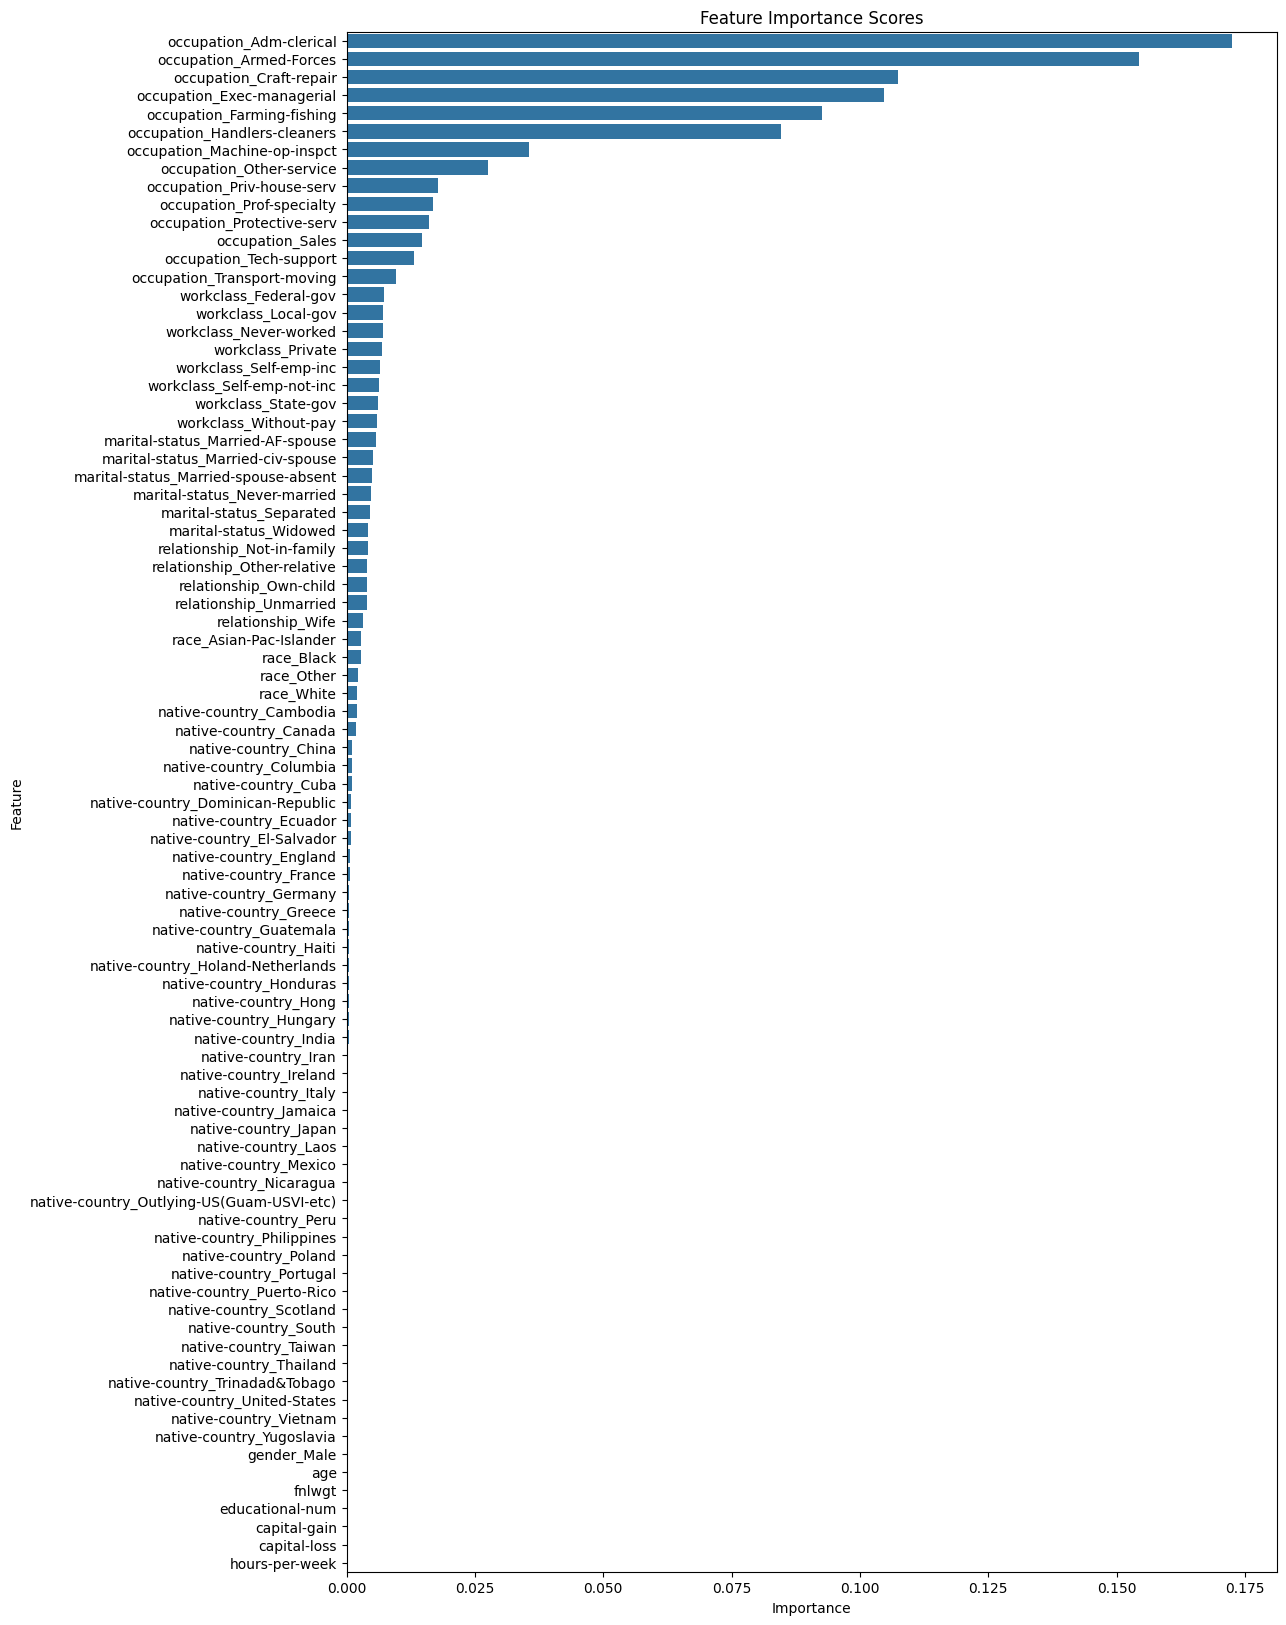

In [74]:
# Create a bar plot of feature importance
plt.figure(figsize=(12, 20))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()


### Label Encoder

In [121]:
le = LabelEncoder()

# Apply LabelEncoder to the categorical columns
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create a pipeline with preprocessing and the machine learning model
model = RandomForestClassifier(random_state=42)

# Fit the pipeline (including preprocessing) to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


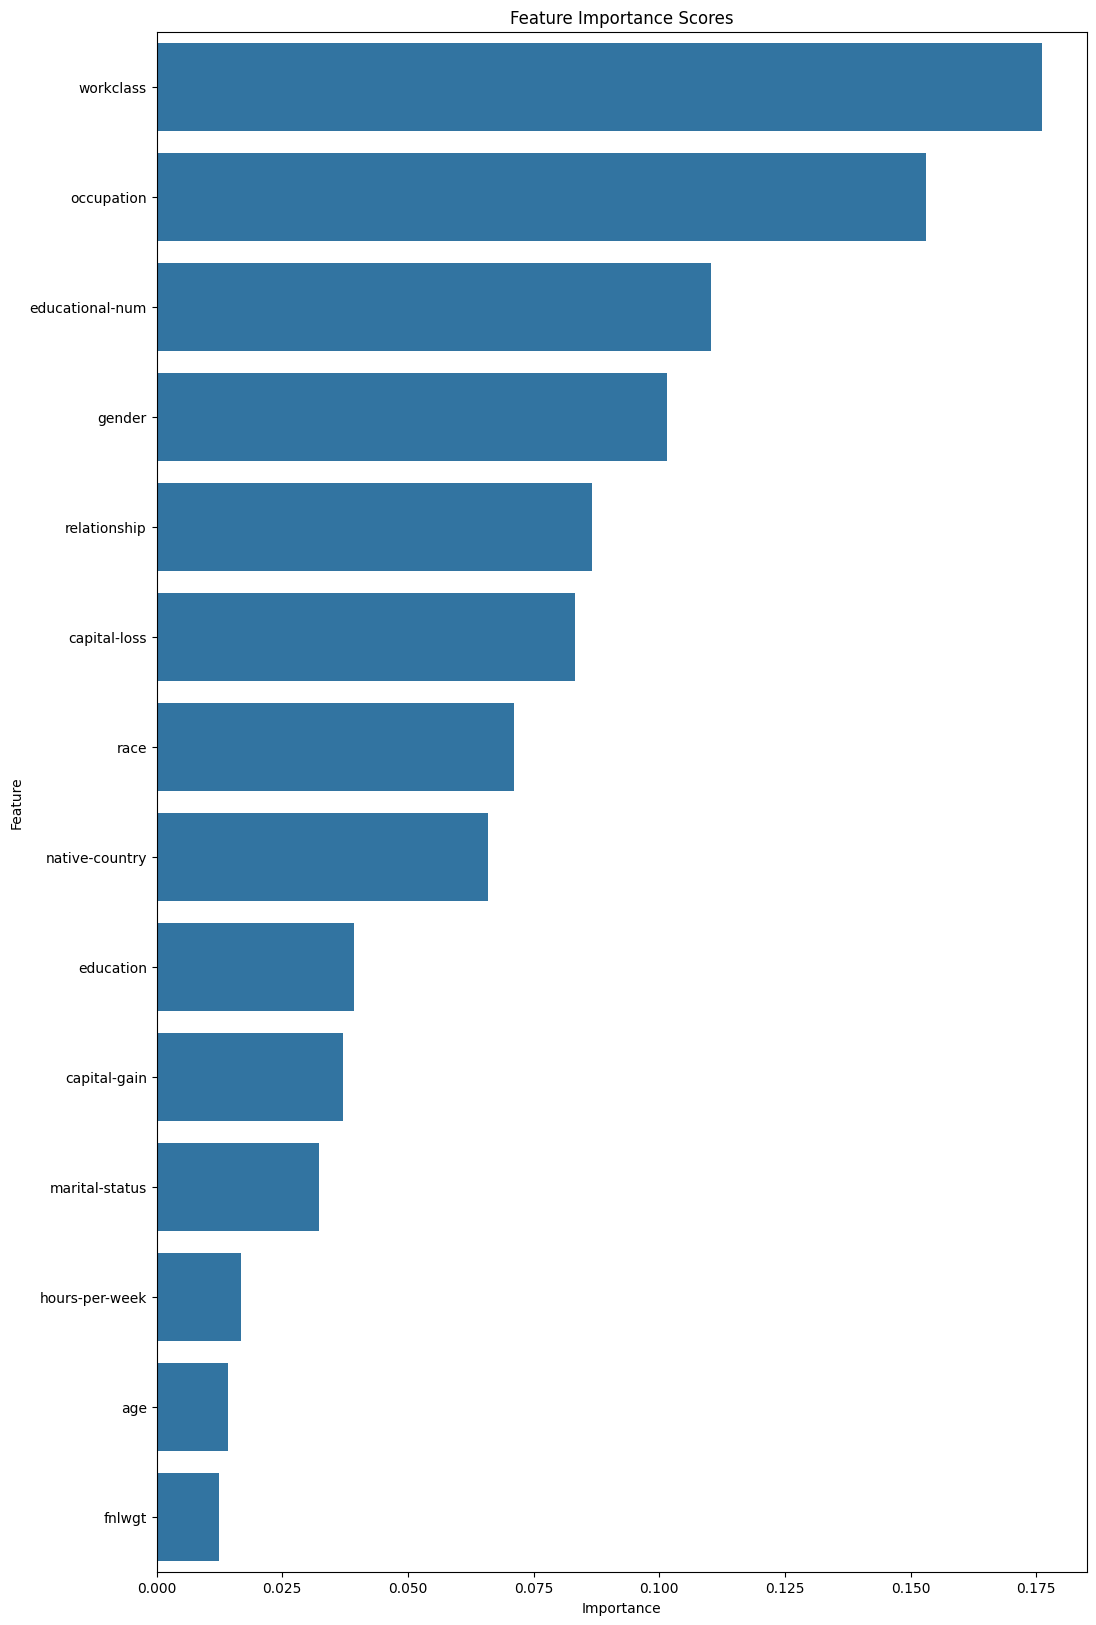

In [125]:
feature_importances = model.feature_importances_

# Combine the one-hot feature names with the numeric feature names
all_feature_names = categorical_cols + numeric_cols

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": all_feature_names, "Importance": feature_importances}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)


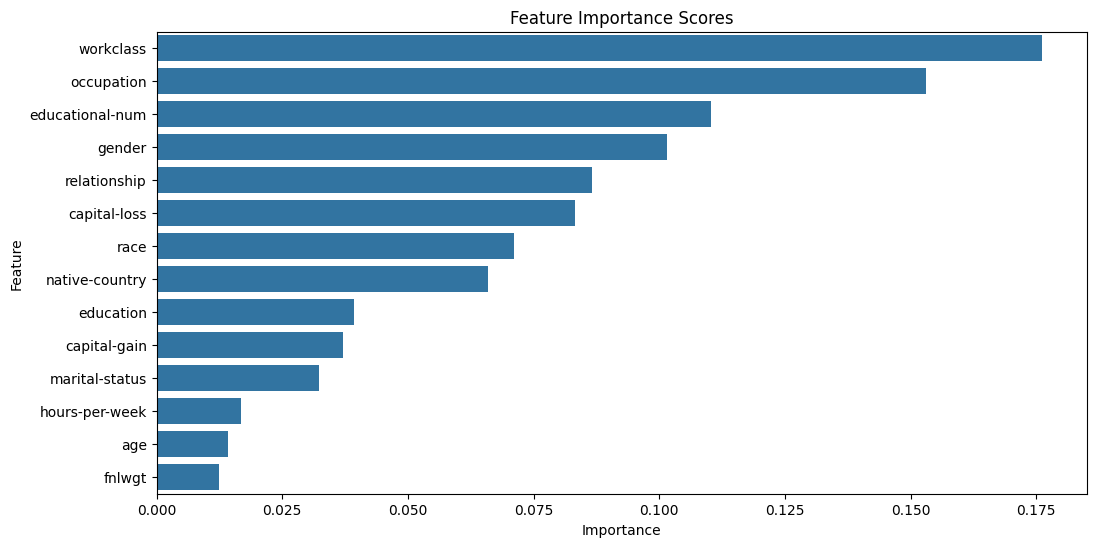

In [127]:
# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Scores")
plt.show()
